In [128]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import erfc

In [162]:
def Q(x):
    return 0.5 * erfc(x / np.sqrt(2))

# 2-PAM (BPSK)

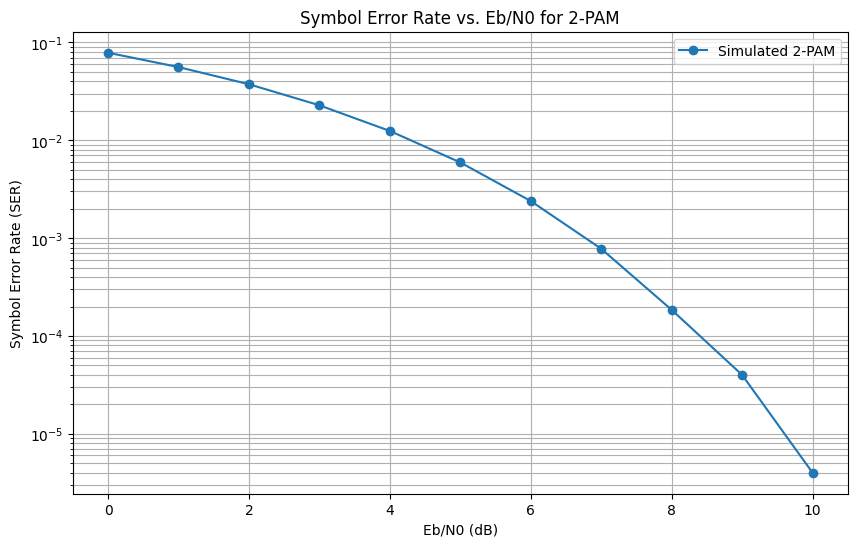

In [164]:
## SIMULATION

def bits_to_symbols_2pam(bits):
    """Convert a sequence of bits to 2-PAM symbols."""
    return np.array([1 if bit == 1 else -1 for bit in bits])

def symbols_to_bits_2pam(symbols):
    """Convert a sequence of 2-PAM symbols to bits."""
    return np.array([1 if symbol > 0 else 0 for symbol in symbols])

def add_awgn_noise_pam(M, symbols, snr_db):
    """Add AWGN noise to the symbols given an SNR in dB."""
    # Convert SNR from dB to linear scale
    snr_linear = 10**(snr_db / 10.0)
    
    # Calculate the signal power (average power of the symbols)
    signal_power = np.mean(np.abs(symbols)**2)
    
    symbol_energy = signal_power
    bit_energy = symbol_energy / np.log2(M)
    
    # Calculate the noise power
    noise_power = bit_energy / snr_linear
    
    # Generate AWGN noise with the calculated noise power
    noise = np.sqrt(noise_power / 2) * np.random.randn(*symbols.shape)
    
    # Add noise to the signal
    return symbols + noise

def add_awgn_noise_2pam(symbols, snr_db):
    return add_awgn_noise_pam(2, symbols, snr_db)

def compute_ser(bits, noisy_bits):
    """Compute the symbol error rate."""
    symbol_errors = np.sum(bits != noisy_bits)
    return symbol_errors / len(bits)

def simulate_2pam_awgn(snr_db_range, num_bits, num_iterations):
    """Simulate 2-PAM modulation in an AWGN channel and compute SER for each SNR using Monte Carlo simulations."""
    ser = []
    for snr_db in snr_db_range:
        total_errors = 0
        total_symbols = 0
        
        for _ in range(num_iterations):
            # Generate random bits
            bits = np.random.randint(0, 2, num_bits)
            
            # Modulate bits to 2-PAM symbols
            symbols = bits_to_symbols_2pam(bits)
            
            # Add AWGN noise to the symbols
            noisy_symbols = add_awgn_noise_2pam(symbols, snr_db)
            
            # Demodulate noisy symbols to bits
            demod_bits = symbols_to_bits_2pam(noisy_symbols)
            
            # Compute the number of symbol errors
            errors = np.sum(bits != demod_bits)
            total_errors += errors
            total_symbols += num_bits
        
        # Calculate average SER for this SNR
        ser.append(total_errors / total_symbols)
    
    return ser

# Define parameters
snr_db_range = np.arange(0, 11, 1)  # SNR range from 0 to 20 dB
num_bits = 1000  # Number of bits per iteration
num_iterations = 1000  # Number of iterations for Monte Carlo simulation

# Run the simulation
simulated_ser = simulate_2pam_awgn(snr_db_range, num_bits, num_iterations)

# Plot the results
plt.figure(figsize=(10, 6))
plt.semilogy(snr_db_range, ser, 'o-', label='Simulated 2-PAM')
plt.grid(True, which='both')
plt.xlabel('Eb/N0 (dB)')
plt.ylabel('Symbol Error Rate (SER)')
plt.title('Symbol Error Rate vs. Eb/N0 for 2-PAM')
plt.legend()
plt.show()

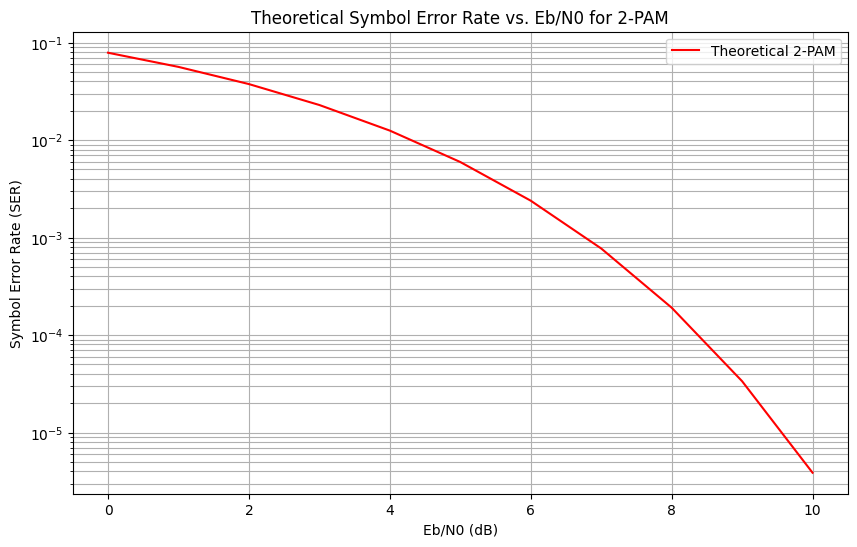

In [140]:
# THEORETICAL

def theoretical_ser_2pam(snr_db):
    """Calculate the theoretical SER for 2-PAM given an SNR in dB."""
    return theoretical_ser_pam(2, snr_db)

# Calculate theoretical SER
theoretical_ser = theoretical_ser_2pam(snr_db_range)

# Plot the theoretical SER
plt.figure(figsize=(10, 6))
plt.semilogy(snr_db_range, theoretical_ser, 'r-', label='Theoretical 2-PAM')
plt.grid(True, which='both')
plt.xlabel('Eb/N0 (dB)')
plt.ylabel('Symbol Error Rate (SER)')
plt.title('Theoretical Symbol Error Rate vs. Eb/N0 for 2-PAM')
plt.legend()
plt.show()

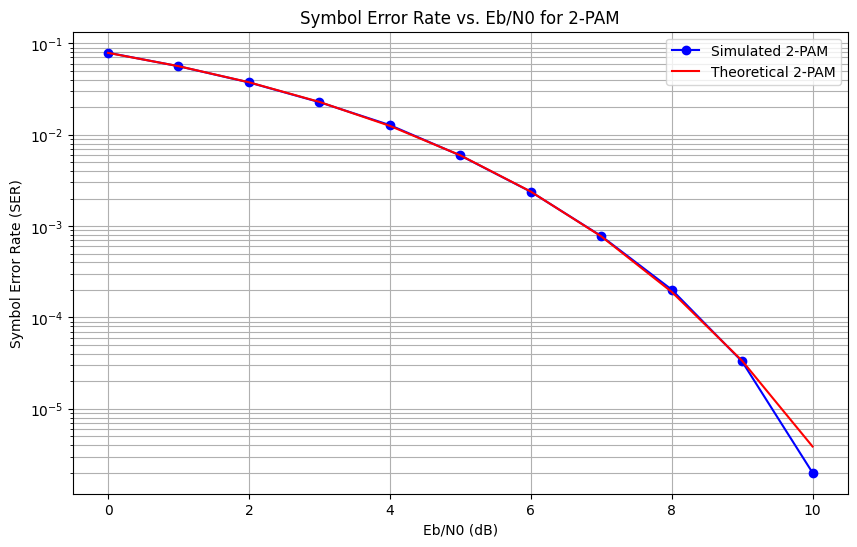

In [141]:
# SIMULATIONA VS THEORETICAL

# Plot the results
plt.figure(figsize=(10, 6))
plt.semilogy(snr_db_range, simulated_ser, 'bo-', label='Simulated 2-PAM')
plt.semilogy(snr_db_range, theoretical_ser, 'r-', label='Theoretical 2-PAM')
plt.grid(True, which='both')
plt.xlabel('Eb/N0 (dB)')
plt.ylabel('Symbol Error Rate (SER)')
plt.title('Symbol Error Rate vs. Eb/N0 for 2-PAM')
plt.legend()
plt.show()


# 4-PAM

In [148]:
# SIMULATION

def bits_to_symbols_4pam(bits):
    """Convert a sequence of bits to 4-PAM symbols."""
    symbols = []
    for i in range(0, len(bits), 2):
        two_bits = bits[i:i+2]
        if np.array_equal(two_bits, [0, 0]):
            symbols.append(-3)
        elif np.array_equal(two_bits, [0, 1]):
            symbols.append(-1)
        elif np.array_equal(two_bits, [1, 0]):
            symbols.append(1)
        else:
            symbols.append(3)
    return np.array(symbols)

def symbols_to_bits_4pam(symbols):
    """Convert a sequence of 4-PAM symbols to bits."""
    bits = []
    for symbol in symbols:
        if symbol <= -2:
            bits.extend([0, 0])
        elif symbol <= 0:
            bits.extend([0, 1])
        elif symbol <= 2:
            bits.extend([1, 0])
        else:
            bits.extend([1, 1])
    return np.array(bits)

def add_awgn_noise_4pam(symbols, snr_db):
    """Add AWGN noise to the symbols given an SNR in dB for 4-PAM."""
    return add_awgn_noise_pam(4, symbols, snr_db)

def simulate_4pam_awgn(snr_db_range, num_bits, num_iterations):
    """Simulate 4-PAM modulation in an AWGN channel and compute SER for each SNR using Monte Carlo simulations."""
    ser = []
    for snr_db in snr_db_range:
        total_errors = 0
        total_symbols = 0
        
        for _ in range(num_iterations):
            bits = np.random.randint(0, 2, num_bits)
            symbols = bits_to_symbols_4pam(bits)
            noisy_symbols = add_awgn_noise_4pam(symbols, snr_db)
            demod_bits = symbols_to_bits_4pam(noisy_symbols)
            errors = np.sum(bits != demod_bits)
            total_errors += errors
            total_symbols += len(symbols)
        
        ser.append(total_errors / total_symbols)
    
    return ser

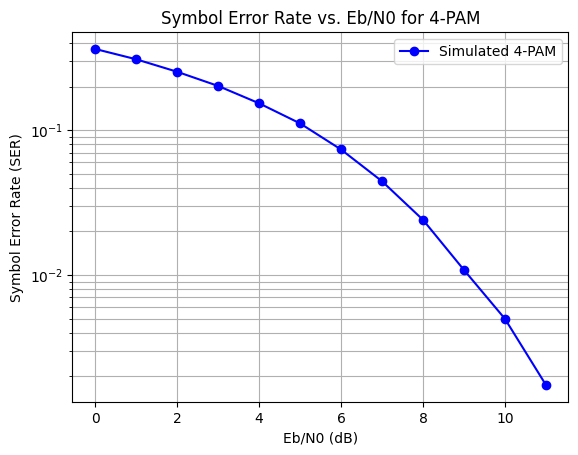

In [155]:
# Define parameters
snr_db_range = np.arange(0, 12, 1)  # SNR range from 0 to 10 dB
num_bits = 100  # Number of bits per iteration
num_iterations = 1000  # Number of iterations for Monte Carlo simulation

# Run the simulation to get the simulated SER
simulated_ser = simulate_4pam_awgn(snr_db_range, num_bits, num_iterations)

# Plot the results
# plt.figure(figsize=(10, 6))
plt.semilogy(snr_db_range, simulated_ser, 'bo-', label='Simulated 4-PAM')
plt.grid(True, which='both')
plt.xlabel('Eb/N0 (dB)')
plt.ylabel('Symbol Error Rate (SER)')
plt.title('Symbol Error Rate vs. Eb/N0 for 4-PAM')
plt.legend()
plt.show()

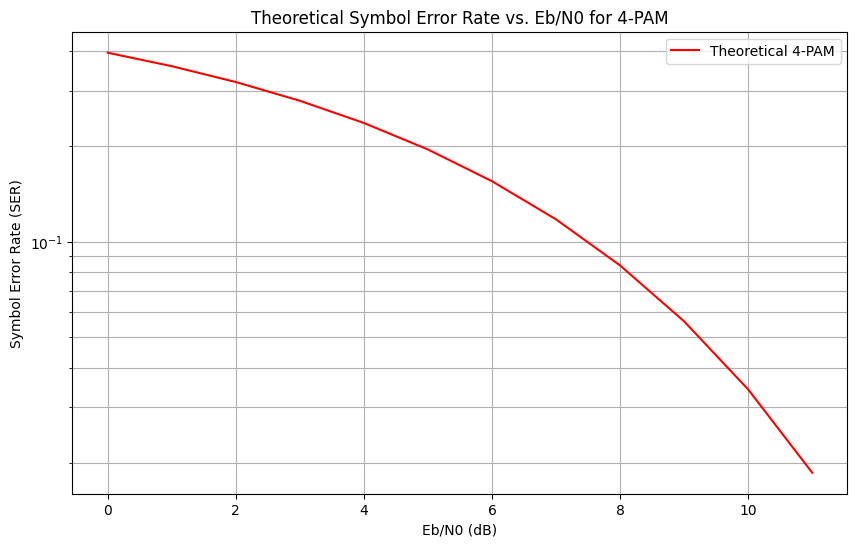

In [153]:
# THEORETICAL

def theoretical_ser_4pam(snr_db):
    """Calculate the theoretical SER for 4-PAM given an SNR in dB."""
    return theoretical_ser_pam(4, snr_db)

# Calculate the theoretical SER
theoretical_ser = theoretical_ser_4pam(snr_db_range)

# Plot the theoretical SER
plt.figure(figsize=(10, 6))
plt.semilogy(snr_db_range, theoretical_ser, 'r-', label='Theoretical 4-PAM')
plt.grid(True, which='both')
plt.xlabel('Eb/N0 (dB)')
plt.ylabel('Symbol Error Rate (SER)')
plt.title('Theoretical Symbol Error Rate vs. Eb/N0 for 4-PAM')
plt.legend()
plt.show()

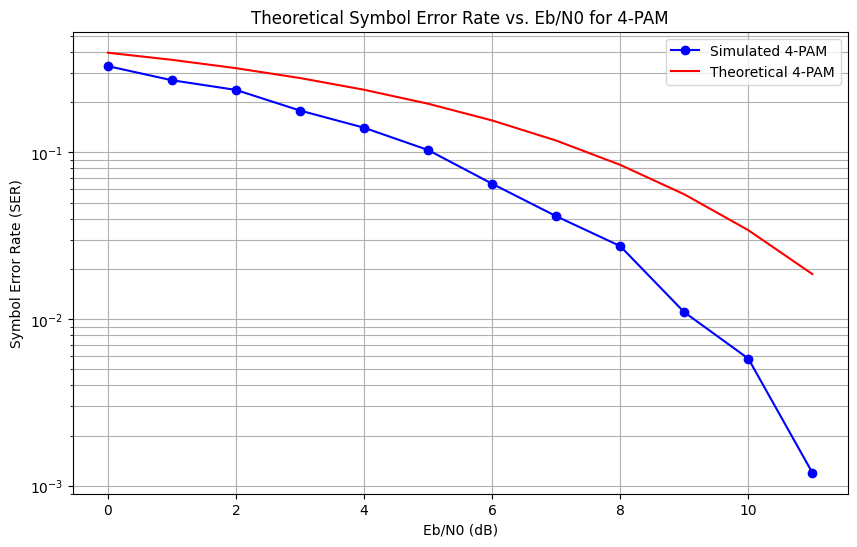

In [154]:
# Plot the theoretical x simulated SER
plt.figure(figsize=(10, 6))
plt.semilogy(snr_db_range, simulated_ser, 'bo-', label='Simulated 4-PAM')
plt.semilogy(snr_db_range, theoretical_ser, 'r-', label='Theoretical 4-PAM')
plt.grid(True, which='both')
plt.xlabel('Eb/N0 (dB)')
plt.ylabel('Symbol Error Rate (SER)')
plt.title('Theoretical Symbol Error Rate vs. Eb/N0 for 4-PAM')
plt.legend()
plt.show()

# 4-QAM

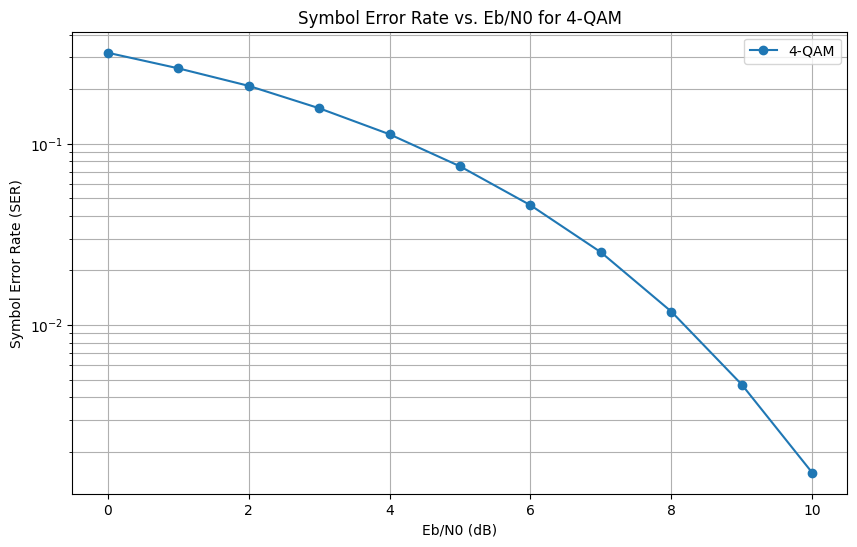

In [39]:
# Define the mapping from bit pairs to constellation points and vice versa
bit_to_symbol = {
    (0, 0): 1 + 1j,
    (0, 1): 1 - 1j,
    (1, 0): -1 + 1j,
    (1, 1): -1 - 1j
}

symbol_to_bit = {v: k for k, v in bit_to_symbol.items()}

def bits_to_symbols(bits):
    """Convert a sequence of bits to 4-QAM symbols."""
    symbols = []
    for i in range(0, len(bits), 2):
        bit_pair = (bits[i], bits[i+1])
        symbols.append(bit_to_symbol[bit_pair])
    return np.array(symbols)

def symbols_to_bits(symbols):
    """Convert a sequence of 4-QAM symbols to bits."""
    bits = []
    for symbol in symbols:
        bit_pair = symbol_to_bit[nearest_symbol(symbol)]
        bits.extend(bit_pair)
    return np.array(bits)

def nearest_symbol(symbol):
    """Find the nearest 4-QAM constellation point to the given symbol."""
    min_distance = float('inf')
    nearest = None
    for point in bit_to_symbol.values():
        distance = abs(symbol - point)
        if distance < min_distance:
            min_distance = distance
            nearest = point
    return nearest

def add_awgn_noise(symbols, snr_db):
    """Add AWGN noise to the symbols given an SNR in dB."""
    snr_linear = 10**(snr_db / 10.0)
    signal_power = np.mean(np.abs(symbols)**2)
    noise_power = signal_power / snr_linear
    noise = np.sqrt(noise_power / 2) * (np.random.randn(*symbols.shape) + 1j * np.random.randn(*symbols.shape))
    return symbols + noise

def compute_ser(bits, noisy_bits):
    """Compute the symbol error rate."""
    symbol_errors = np.sum(bits != noisy_bits) / 2
    return symbol_errors / (len(bits) / 2)

def simulate_4qam_awgn(snr_db_range, num_bits, num_iterations):
    """Simulate 4-QAM modulation in an AWGN channel and compute SER for each SNR using Monte Carlo simulations."""
    ser = []
    for snr_db in snr_db_range:
        total_errors = 0
        total_symbols = 0
        
        for _ in range(num_iterations):
            # Generate random bits
            bits = np.random.randint(0, 2, num_bits)
            
            # Modulate bits to 4-QAM symbols
            symbols = bits_to_symbols(bits)
            
            # Add AWGN noise to the symbols
            noisy_symbols = add_awgn_noise(symbols, snr_db)
            
            # Demodulate noisy symbols to bits
            demod_bits = symbols_to_bits(noisy_symbols)
            
            # Compute the number of symbol errors
            errors = np.sum(bits != demod_bits)
            total_errors += errors
            total_symbols += num_bits / 2
        
        # Calculate average SER for this SNR
        ser.append(total_errors / total_symbols)
    
    return ser

# Define parameters
snr_db_range = np.arange(0, 11, 1)  # SNR range from 0 to 20 dB
num_bits = 1000  # Number of bits per iteration
num_iterations = 1000  # Number of iterations for Monte Carlo simulation

# Run the simulation
ser = simulate_4qam_awgn(snr_db_range, num_bits, num_iterations)

# Plot the results
plt.figure(figsize=(10, 6))
plt.semilogy(snr_db_range, ser, 'o-', label='Simulated4-QAM')
plt.grid(True, which='both')
plt.xlabel('Eb/N0 (dB)')
plt.ylabel('Symbol Error Rate (SER)')
plt.title('Symbol Error Rate vs. Eb/N0 for 4-QAM')
plt.legend()
plt.show()